<a href="https://colab.research.google.com/github/DS3001/group14/blob/main/Correlation_Matrix_Comparing_Varibles_Shruti_Elango.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shruti Elango (se2ezr)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import PolynomialFeatures
df = pd.read_csv('/content/training_data_cleaned.csv')

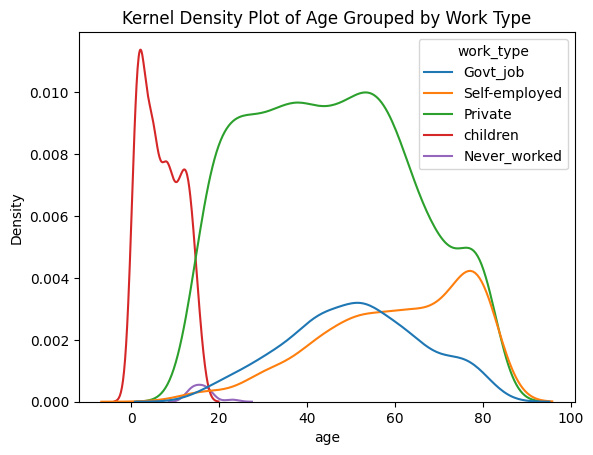

Summary Statistics: 
                  id          age  hypertension  heart_disease  \
count   4087.000000  4087.000000   4087.000000    4087.000000   
mean   36383.068265    43.324169      0.097871       0.056031   
std    21189.857848    22.531019      0.297177       0.230010   
min       67.000000     0.080000      0.000000       0.000000   
25%    17417.500000    26.000000      0.000000       0.000000   
50%    36814.000000    45.000000      0.000000       0.000000   
75%    54584.500000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        4087.000000  4087.000000  4087.000000  
mean          106.010396    28.891338     0.048691  
std            45.047912     7.690618     0.215248  
min            55.120000    10.300000     0.000000  
25%            77.295000    23.900000     0.000000  
50%            92.000000    28.100000     0.000000  
75%           113.845

In [5]:
# Kernel Density Plot of 'AGE' by 'SEX'
sns.kdeplot(data=df, x='age', hue='work_type')
plt.title('Kernel Density Plot of Age Grouped by Work Type')
plt.show()

# Summary Statistics
summary_stats = df.describe()
print("Summary Statistics: \n", summary_stats)

In [7]:
columns_of_interest = ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
# Create a new DataFrame with only the columns of interest
df_selected = df[columns_of_interest]
X = df_selected
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
zdf.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,id^2,id age,id hypertension,...,heart_disease^2,heart_disease avg_glucose_level,heart_disease bmi,heart_disease stroke,avg_glucose_level^2,avg_glucose_level bmi,avg_glucose_level stroke,bmi^2,bmi stroke,stroke^2
0,68685.0,36.0,0.0,0.0,65.87,32.2,0.0,4.717629e+09,2472660.0,0.0,...,0.0,0.0,0.0,0.0,4338.8569,2121.014,0.0,1036.84,0.0,0.0
1,59058.0,45.0,0.0,0.0,68.66,25.3,0.0,3.487847e+09,2657610.0,0.0,...,0.0,0.0,0.0,0.0,4714.1956,1737.098,0.0,640.09,0.0,0.0
2,46068.0,58.0,0.0,0.0,170.93,30.7,0.0,2.122261e+09,2671944.0,0.0,...,0.0,0.0,0.0,0.0,29217.0649,5247.551,0.0,942.49,0.0,0.0
3,36837.0,61.0,0.0,0.0,69.88,27.1,0.0,1.356965e+09,2247057.0,0.0,...,0.0,0.0,0.0,0.0,4883.2144,1893.748,0.0,734.41,0.0,0.0
4,30550.0,78.0,0.0,0.0,103.86,30.6,0.0,9.333025e+08,2382900.0,0.0,...,0.0,0.0,0.0,0.0,10786.8996,3178.116,0.0,936.36,0.0,0.0


In [8]:
## Compute all polynomials up to degree 3:
expander = PolynomialFeatures(degree=3,include_bias=False) # Create the expander
Z = expander.fit_transform(X) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
zdf.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,id^2,id age,id hypertension,...,avg_glucose_level^3,avg_glucose_level^2 bmi,avg_glucose_level^2 stroke,avg_glucose_level bmi^2,avg_glucose_level bmi stroke,avg_glucose_level stroke^2,bmi^3,bmi^2 stroke,bmi stroke^2,stroke^3
0,68685.0,36.0,0.0,0.0,65.87,32.2,0.0,4.717629e+09,2472660.0,0.0,...,2.858005e+05,139711.19218,0.0,68296.6508,0.0,0.0,33386.248,0.0,0.0,0.0
1,59058.0,45.0,0.0,0.0,68.66,25.3,0.0,3.487847e+09,2657610.0,0.0,...,3.236767e+05,119269.14868,0.0,43948.5794,0.0,0.0,16194.277,0.0,0.0,0.0
2,46068.0,58.0,0.0,0.0,170.93,30.7,0.0,2.122261e+09,2671944.0,0.0,...,4.994073e+06,896963.89243,0.0,161099.8157,0.0,0.0,28934.443,0.0,0.0,0.0
3,36837.0,61.0,0.0,0.0,69.88,27.1,0.0,1.356965e+09,2247057.0,0.0,...,3.412390e+05,132335.11024,0.0,51320.5708,0.0,0.0,19902.511,0.0,0.0,0.0
4,30550.0,78.0,0.0,0.0,103.86,30.6,0.0,9.333025e+08,2382900.0,0.0,...,1.120327e+06,330079.12776,0.0,97250.3496,0.0,0.0,28652.616,0.0,0.0,0.0


<Axes: >

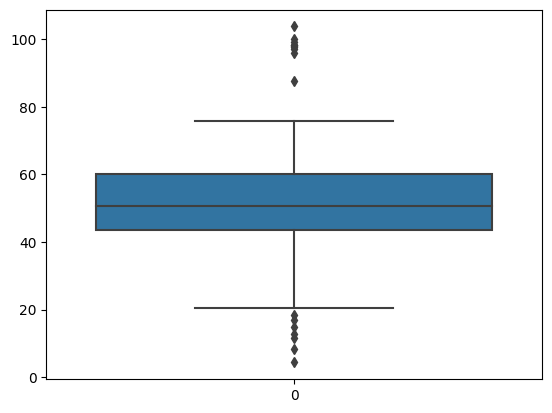

In [9]:
## Generate random data with outliers
np.random.seed(1000)
N = 200
switch = np.random.uniform(0,1,N)
x = (switch<.05)*np.random.normal(20,10,N)+(switch >= .05)*(switch<.95)*np.random.normal(50,10,N)+(switch>=.95)*np.random.normal(100,5,N)
sns.boxplot(x)

<Axes: >

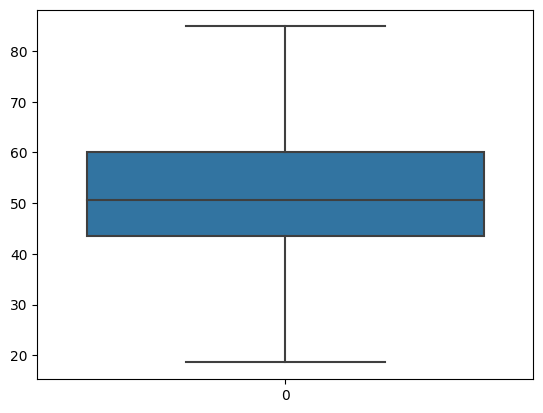

In [11]:
## Function to compute whiskers:
def windsorize(x):
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)

sns.boxplot( windsorize(x))

## Diabetes Data
- `'./data/diabetes-dataset.csv'`
- 1000 patients with characteristics like Age, BloodPressure, BMI, Insulin levels, and past Pregnancies
- Outcome is whether the patient has diabetes or not
- The goal is to predict the likelihood someone has diabetes from other health characteristics

In [12]:
df = pd.read_csv('/content/training_data_cleaned.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,68685,Male,36.0,0,0,Yes,Govt_job,Urban,65.87,32.2,formerly smoked,0
1,59058,Female,45.0,0,0,Yes,Govt_job,Rural,68.66,25.3,never smoked,0
2,46068,Male,58.0,0,0,No,Self-employed,Rural,170.93,30.7,Unknown,0
3,36837,Female,61.0,0,0,Yes,Self-employed,Urban,69.88,27.1,never smoked,0
4,30550,Female,78.0,0,0,No,Private,Urban,103.86,30.6,Unknown,0


In [14]:
y = df['ever_married']
print(y.describe())
X = df.drop('ever_married',axis=1)
X.head()

count     4087
unique       2
top        Yes
freq      2686
Name: ever_married, dtype: object


,id,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,68685,Male,36.0,0,0,Govt_job,Urban,65.87,32.2,formerly smoked,0
1,59058,Female,45.0,0,0,Govt_job,Rural,68.66,25.3,never smoked,0
2,46068,Male,58.0,0,0,Self-employed,Rural,170.93,30.7,Unknown,0
3,36837,Female,61.0,0,0,Self-employed,Urban,69.88,27.1,never smoked,0
4,30550,Female,78.0,0,0,Private,Urban,103.86,30.6,Unknown,0


In [15]:
X.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000
mean,36383.068265,43.324169,0.097871,0.056031,106.010396,28.891338,0.048691
std,21189.857848,22.531019,0.297177,0.230010,45.047912,7.690618,0.215248
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17417.500000,26.000000,0.000000,0.000000,77.295000,23.900000,0.000000
50%,36814.000000,45.000000,0.000000,0.000000,92.000000,28.100000,0.000000
75%,54584.500000,61.000000,0.000000,0.000000,113.845000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<Axes: >

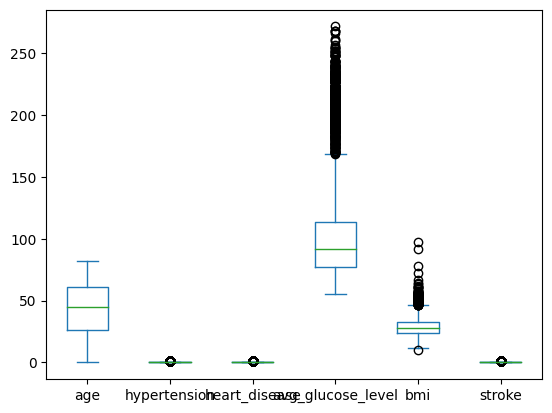

In [30]:
columns_of_interest = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
# Create a new DataFrame with only the columns of interest
df_selected = df[columns_of_interest]
X = df_selected

X.plot.box() # Hmm, outliers

<Axes: >

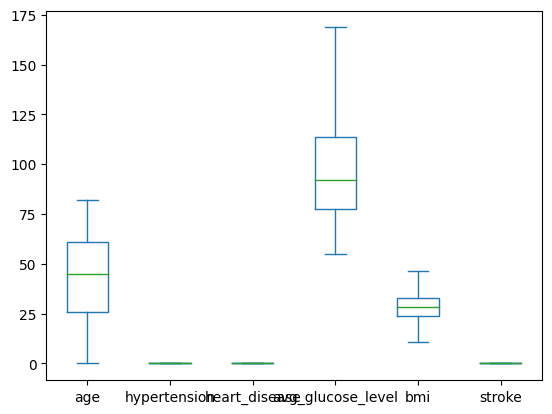

In [31]:
X.apply(windsorize)
X.plot.box()

In [21]:
## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

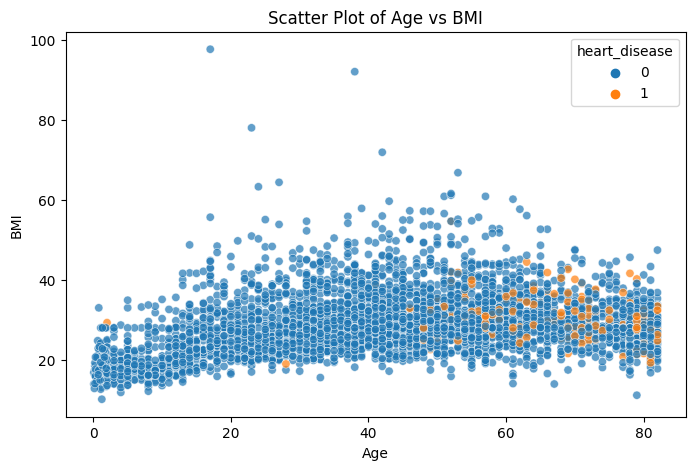

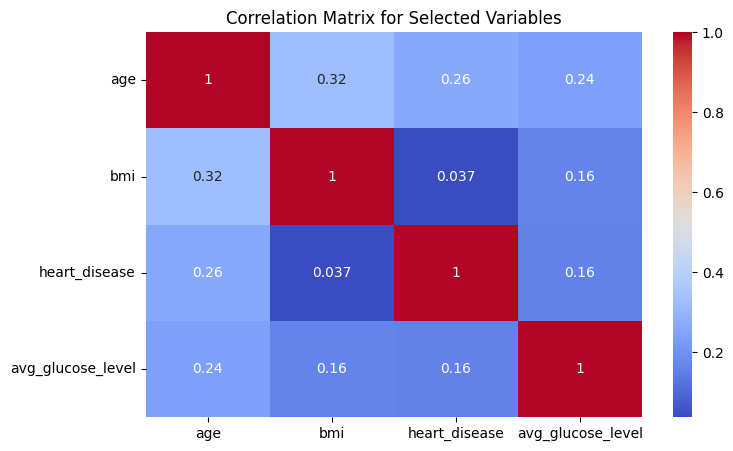

In [33]:
columns_of_interest = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
# Create a new DataFrame with only the columns of interest
df_selected = df[columns_of_interest]
X = df_selected

# Scatter plot
df_to_plot= X
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_to_plot, x='age', y='bmi', hue='heart_disease', alpha=0.7)  # Note the change here
plt.title('Scatter Plot of Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


# Selecting a subset of variables for the correlation matrix
selected_vars = ['age', 'bmi', 'heart_disease', 'avg_glucose_level']
correlation_matrix_subset = df_to_plot[selected_vars].astype(float).corr()  # Also note the change here

# Plotting the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Selected Variables')
plt.show()

In [36]:
columns_of_interest = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
# Create a new DataFrame with only the columns of interest
df_selected = df[columns_of_interest]
df_cleaned = df_selected.dropna(thresh=len(df_selected.columns) - 3)
df = df_cleaned.apply (pd.to_numeric, errors='coerce')
df = df.dropna()
X= df

## kNN sample code:
from sklearn.neighbors import KNeighborsRegressor

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X:
X_train_knn = X_train.apply(maxmin)
X_test_knn = X_test.apply(maxmin)

# Determine optimal k:
k_bar = 70
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar-1) # For comparison purposes, store the training error
for k in range(k_bar-1):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train_knn,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test_knn) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index][0] # Find the optimal value of k

## SSE plot:
plt.plot(k_grid,SSE)
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('SSE')
plt.show()

## Fit optimal model:
model = KNeighborsRegressor(n_neighbors=max(3,k_star))
knn_star = model.fit(X_train_knn,y_train)
y_hat_knn = knn_star.predict(X_test_knn)
residuals_knn = y_test - y_hat_knn

ValueError: ignored

In [23]:
## Residual plot:
sns.kdeplot(residuals_knn)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_knn,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_knn = np.sum( (y_test-y_hat_knn)**2 )
MSE_knn = SSE_knn/N_test
RMSE_knn = (SSE_knn/N_test)**(1/2)
R2_knn = 1 - SSE_knn/TSS

NameError: ignored

0.15748021342692942


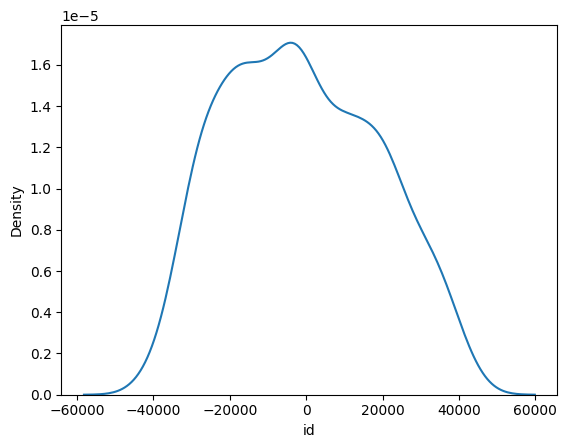

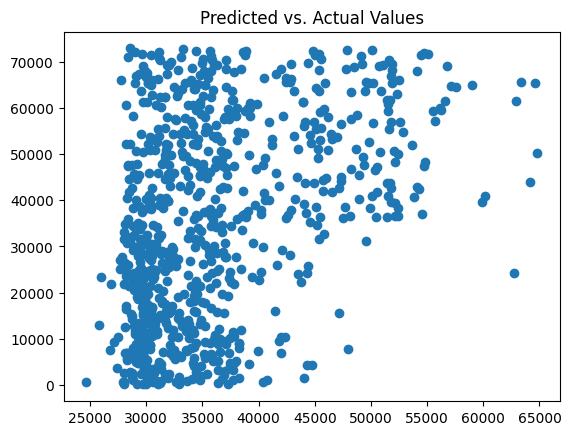

In [37]:
## Linear Model sample code:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

# Expand features
expander = PolynomialFeatures(degree=3,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model
print(reg.score(X_test_lm, y_test)) # R squared measure

# Predicted values:
y_hat_lm = reg.predict(X_test_lm)
residuals_lm = y_test - y_hat_lm

## Residual plot:
sns.kdeplot(residuals_lm)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_lm,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_lm = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS

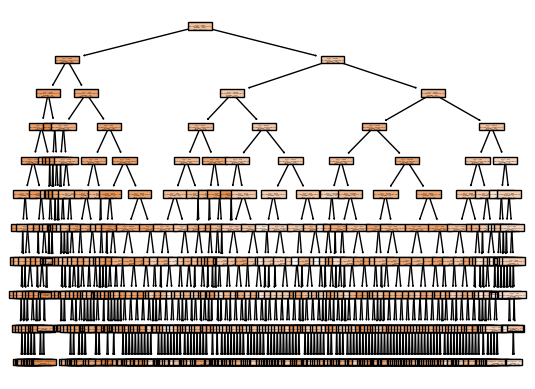

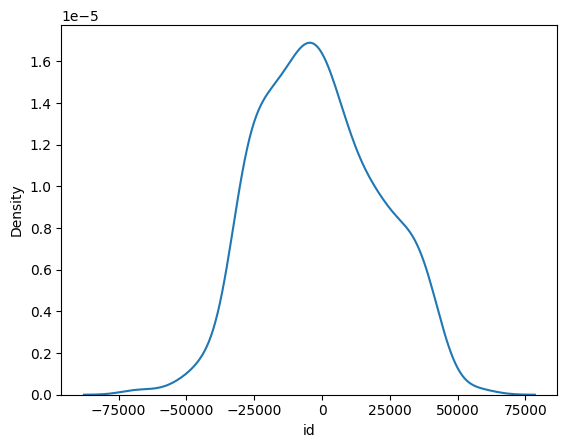

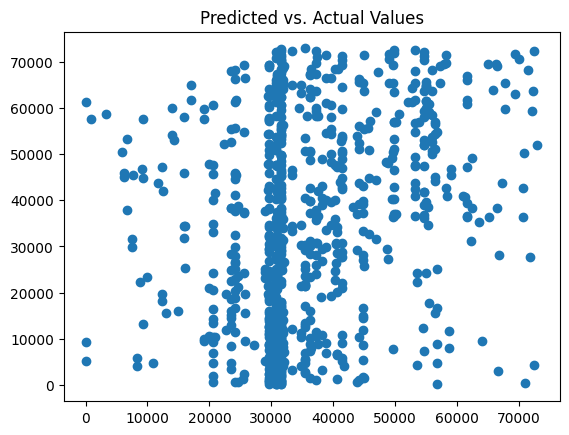

In [38]:
## Decision Trees sample code:
from sklearn import tree

model = tree.DecisionTreeRegressor(max_depth=10) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart

## Residual plot:
sns.kdeplot(residuals_cart)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_cart,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()


## Metrics:
SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS
